# MODIS EVI - Training first set of models

## Importing Cleaned Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ # change this to the root working directory

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import pandas as pd

In [ ]:
file_path = 'Modeling VIs in Tallgrass/data/P13_Cleaned_Data.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,DATE,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean,MODIS_EVI,LSWI
0,6,2000-02-18,52.10875,71.93625,4.46000,12.16500,0.00000,14.49375,13.258750,1.06,50.37625,50.81500,1.863600,1.581400,1.504100,0.254,-0.111
1,7,2000-02-26,48.71250,66.61750,5.25500,16.66875,0.00000,12.51125,14.832385,0.78,49.21875,49.43125,1.671738,1.570663,1.491400,0.211,-0.136
2,8,2000-03-05,50.03750,72.90625,4.11375,14.25750,0.00000,13.49750,17.770000,0.71,51.34375,51.30125,1.562450,1.557400,1.478662,0.231,-0.092
3,9,2000-03-13,47.88250,81.58250,3.14125,15.82625,0.00000,10.42750,12.791250,0.95,50.05750,49.97750,1.594888,1.547525,1.471650,0.170,-0.205
4,10,2000-03-21,57.95000,75.16625,5.15500,6.97000,0.00000,10.11750,16.667500,2.39,56.53125,56.36875,1.507513,1.531750,1.465475,0.187,-0.206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1090,2023-09-14,71.42375,73.00250,8.62500,0.00000,6.97375,8.59875,15.427500,0.99,71.31000,71.28000,1.520763,3.208450,3.473537,0.379,0.084
1070,1091,2023-09-22,75.57250,66.09000,12.62500,0.00000,11.76625,9.57000,18.105000,0.39,72.30125,75.01625,1.620875,2.699000,3.452688,0.446,0.163
1071,1092,2023-09-30,68.66625,63.53250,10.45000,2.35625,7.10750,8.96625,15.098750,1.52,69.67000,72.41000,1.813212,2.058113,3.441438,0.426,0.125
1072,1093,2023-10-08,61.79500,65.17125,7.83500,4.42000,1.91250,12.27000,15.991250,0.00,64.46500,64.92125,1.711912,1.664287,3.413925,0.401,0.105


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

## Correlation Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-6-bc8bb6c44ae5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


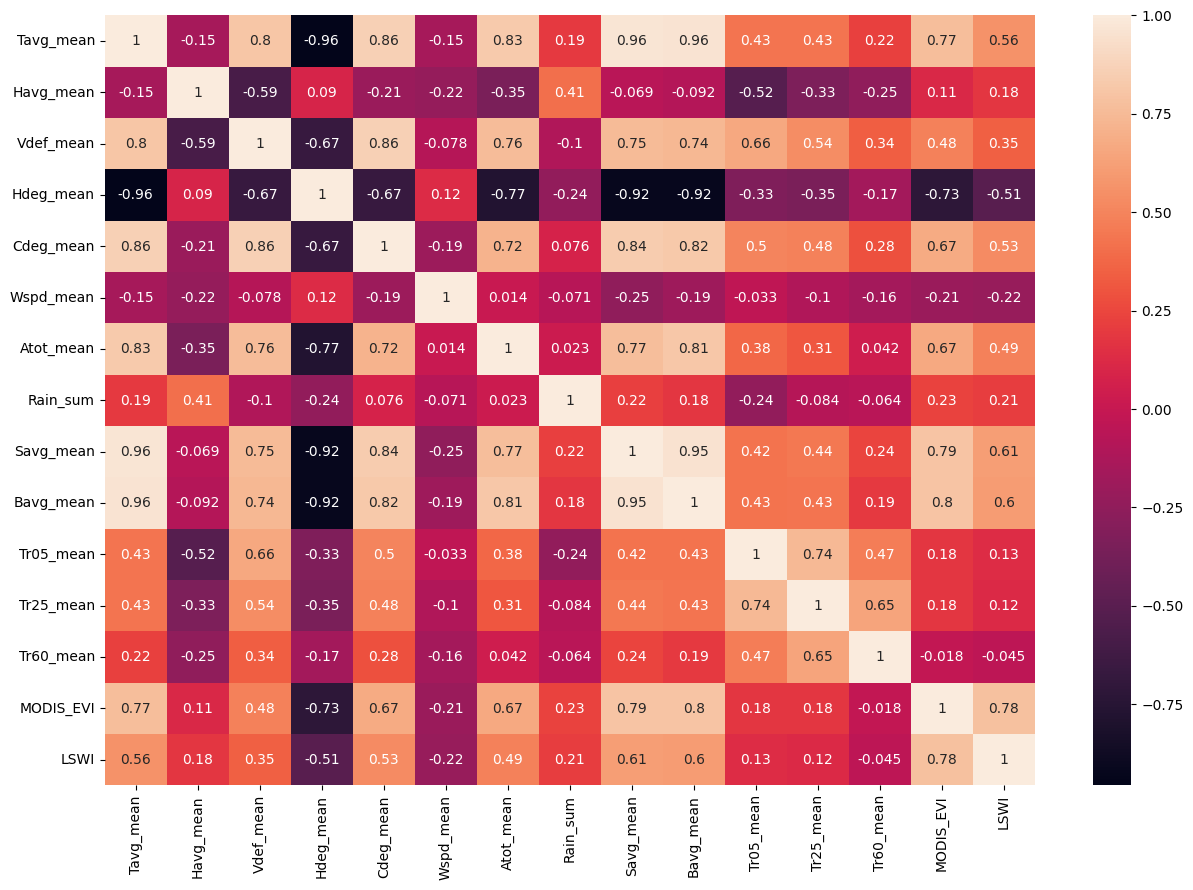

In [ ]:
# Correlation plot
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

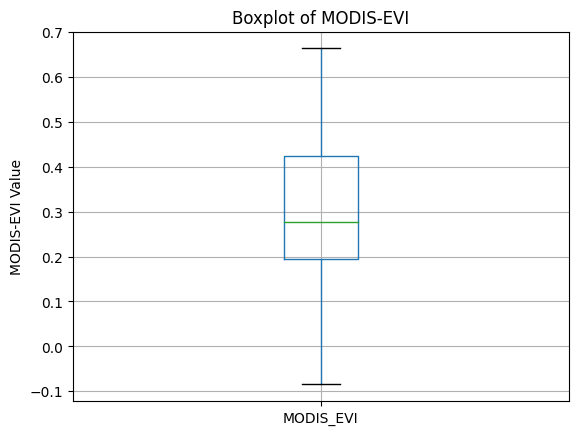

In [ ]:
# df as dataframe
df.boxplot(column='MODIS_EVI')

# Set plot labels
plt.title('Boxplot of MODIS-EVI')
plt.ylabel('MODIS-EVI Value')

# Show the plot
plt.show()

In [ ]:
# No outliers needed to be removed

## Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Training data from 2000-2021 and testing data from 2022-2023
train_test = df[df['DATE'] < '2022-01-01']
validation = df[df['DATE'] >= '2022-01-01']

In [ ]:
train_test.head()

,DATE,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean,MODIS_EVI,LSWI
0,2000-02-18,52.10875,71.93625,4.46000,12.16500,0.0,14.49375,13.258750,1.06,50.37625,50.81500,1.863600,1.581400,1.504100,0.254,-0.111
1,2000-02-26,48.71250,66.61750,5.25500,16.66875,0.0,12.51125,14.832385,0.78,49.21875,49.43125,1.671738,1.570663,1.491400,0.211,-0.136
2,2000-03-05,50.03750,72.90625,4.11375,14.25750,0.0,13.49750,17.770000,0.71,51.34375,51.30125,1.562450,1.557400,1.478662,0.231,-0.092
3,2000-03-13,47.88250,81.58250,3.14125,15.82625,0.0,10.42750,12.791250,0.95,50.05750,49.97750,1.594888,1.547525,1.471650,0.170,-0.205
4,2000-03-21,57.95000,75.16625,5.15500,6.97000,0.0,10.11750,16.667500,2.39,56.53125,56.36875,1.507513,1.531750,1.465475,0.187,-0.206


In [ ]:
validation.head()

,DATE,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean,MODIS_EVI,LSWI
1003,2022-01-01,29.5525,70.85500,1.96750,33.25625,0.0,13.383459,9.311250,0.27,42.59500,38.63625,1.859687,2.062813,2.499887,0.215,-0.107
1004,2022-01-09,38.6850,55.47125,4.69500,25.25000,0.0,12.516250,10.290000,0.00,43.06500,41.76750,1.919175,2.093062,2.510638,0.186,-0.147
1005,2022-01-17,33.8025,49.80125,4.40875,30.89375,0.0,10.848750,12.272385,0.00,40.18875,39.08500,2.062250,2.117025,2.512113,0.300,-0.035
1006,2022-01-25,38.3050,57.68875,4.39500,26.36125,0.0,10.122500,11.141250,0.06,41.04625,41.53000,2.097400,2.133513,2.517025,0.206,-0.123
1007,2022-02-10,44.7975,51.22250,6.11750,18.91250,0.0,10.757669,15.089769,0.54,44.20500,46.23875,1.587163,1.971113,2.500637,0.244,-0.072


In [ ]:
len(train_test)

1003

In [ ]:
len(validation)

71

## MODIS EVI Training

In [ ]:
X = train_test[['Tavg_mean', 'Havg_mean', 'Vdef_mean', 'Hdeg_mean', 'Cdeg_mean',
       'Wspd_mean', 'Atot_mean', 'Rain_sum', 'Savg_mean', 'Bavg_mean',
       'Tr05_mean', 'Tr25_mean', 'Tr60_mean']]
y = train_test[['MODIS_EVI']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_val = validation[['Tavg_mean', 'Havg_mean', 'Vdef_mean', 'Hdeg_mean', 'Cdeg_mean',
       'Wspd_mean', 'Atot_mean', 'Rain_sum', 'Savg_mean', 'Bavg_mean',
       'Tr05_mean', 'Tr25_mean', 'Tr60_mean']]
y_val = validation[['MODIS_EVI']]

In [ ]:
len(X_train), len(X_test), len(X_val)

(802, 201, 71)

### Linear Regression

#### Testing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_curve, auc
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
# Train a linear regression model
simple_lr_model = LinearRegression(fit_intercept=True, n_jobs=None) # normalize=True
simple_lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_l = simple_lr_model.predict(X_test)

# Calculate the MSE and R2 score on the testing set
mse_lr_test = mean_squared_error(y_test, y_pred_l)
mae_lr_test = mean_absolute_error(y_test, y_pred_l)
rmse_lr_test = mean_squared_error(y_test, y_pred_l, squared=False)
r2_lr_test = r2_score(y_test, y_pred_l)

print('MSE:', mse_lr_test)
print('MAE:', mae_lr_test)
print('RMSE:', rmse_lr_test)
print('R2 score:', r2_lr_test)

MSE: 0.0047979445971158595
MAE: 0.05284962441602562
RMSE: 0.06926719712184014
R2 score: 0.7360073326047718


In [ ]:
# Tuned linear regression model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [None, 5, 10, 15, 20]
}

# Create the linear regression model
lr_model = LinearRegression()

# Create the GridSearchCV object
linear_grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
linear_grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_lr_model = linear_grid_search.best_estimator_
best_params = linear_grid_search.best_params_

# Make predictions on the testing set
y_pred_l = best_lr_model.predict(X_test)

# Calculate the MSE and R2 score on the testing set
mse = mean_squared_error(y_test, y_pred_l)
mae = mean_absolute_error(y_test, y_pred_l)
rmse = mean_squared_error(y_test, y_pred_l, squared=False)
r2 = r2_score(y_test, y_pred_l)

# Print the best parameters and evaluation metrics
print("Best parameters:", best_params)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

Best parameters: {'fit_intercept': True, 'n_jobs': None}
MSE: 0.0047979445971158595
MAE: 0.05284962441602562
RMSE: 0.06926719712184014
R2 score: 0.7360073326047718


### XGBoost

In [ ]:
# Train an XGBoost regression model
simple_xgb_model = XGBRegressor(n_estimators=700, random_state=42)
simple_xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_x = simple_xgb_model.predict(X_test)

# Calculate the MSE and R2 score on the testing set
mse_x_test = mean_squared_error(y_test, y_pred_x)
mae_x_test = mean_absolute_error(y_test, y_pred_x)
rmse_x_test = mean_squared_error(y_test, y_pred_x, squared=False)
r2_x_test = r2_score(y_test, y_pred_x)

print('MSE:', mse_x_test)
print('MAE:', mae_x_test)
print('RMSE:', rmse_x_test)
print('R2 score:', r2_x_test)

MSE: 0.004104392502362578
MAE: 0.04678350110196355
RMSE: 0.06406553287347712
R2 score: 0.7741679790577399


In [ ]:
# Tuned XGBoost model
# Define the parameter grid
param_grid = {
    'n_estimators': [500], # 100, 300
    'learning_rate': [0.01, 0.1], # 0.2
    'max_depth': [5, 7], # 3, 7
    'min_child_weight': [1, 3], # 5
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create the XGBoost regression model
xgb_model = XGBRegressor(random_state=42)

# Create the GridSearchCV object
xgb_grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
xgb_grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_xgb_model = xgb_grid_search.best_estimator_
best_params = xgb_grid_search.best_params_

# Make predictions on the testing set
y_pred_x = best_xgb_model.predict(X_test)

# Calculate the MSE and R2 score on the testing set
mse = mean_squared_error(y_test, y_pred_x)
mae = mean_absolute_error(y_test, y_pred_x)
rmse = mean_squared_error(y_test, y_pred_x, squared=False)
r2 = r2_score(y_test, y_pred_x)

# Print the best parameters and evaluation metrics
print("Best parameters:", best_params)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 500, 'subsample': 0.8}
MSE: 0.003599003497350255
MAE: 0.04314550666607434
RMSE: 0.05999169523650966
R2 score: 0.8019755097211044


### Random Forest

In [ ]:
# Train a random forest regression model
rf_model = RandomForestRegressor(n_estimators=400, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_r = rf_model.predict(X_test)

# Calculate the MSE and R2 score on the testing set
mse_rf_test = mean_squared_error(y_test, y_pred_r)
mae_rf_test = mean_absolute_error(y_test, y_pred_r)
rmse_rf_test = mean_squared_error(y_test, y_pred_r, squared=False)
r2_rf_test = r2_score(y_test, y_pred_r)

print('MSE:', mse_rf_test)
print('MAE:', mae_rf_test)
print('RMSE:', rmse_rf_test)
print('R2 score:', r2_rf_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 0.0036627390271766116
MAE: 0.04326002487562187
RMSE: 0.06052056697666184
R2 score: 0.7984686512765901


In [ ]:
# Tuned random forest model
# define the parameter grid
param_grid = {
    'n_estimators': [50, 100], # 50, 150
    'max_depth': [None, 5], # 10, 20
    'min_samples_split': [2, 5], # 10, 15
    'min_samples_leaf': [1, 2], # 1, 4
    'max_features': ['auto', 'sqrt', 'log2', 0.5]
}

# create the model
rf = RandomForestRegressor(random_state=42)

# create the grid search object
rf_grid_search = GridSearchCV(rf, param_grid=param_grid, cv=10, n_jobs=-1)

# fit the grid search object to the data
rf_grid_search.fit(X_train, y_train)

y_pred_r_cv = rf_grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred_r_cv)
mae = mean_absolute_error(y_test, y_pred_r_cv)
rmse = mean_squared_error(y_test, y_pred_r_cv, squared =False)
r2 = r2_score(y_test, y_pred_r_cv)

# print the best parameters and the corresponding score
print("Best parameters: ", rf_grid_search.best_params_)
print("Best score: ", rf_grid_search.best_score_)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
126 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters:  {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.7869012091407932
MSE: 0.0034994630049751253
MAE: 0.043329154228855735
RMSE: 0.05915625922060256
R2 score: 0.8074524300072914


### Decision Tree

In [ ]:
# Create the decision tree regression model
model = DecisionTreeRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_d = model.predict(X_test)

# Evaluate the model using the mean squared error
mse_dt_test = mean_squared_error(y_test, y_pred_d)
mae_dt_test = mean_absolute_error(y_test, y_pred_d)
rmse_dt_test = mean_squared_error(y_test, y_pred_d, squared=False)
r2_dt_test = r2_score(y_test, y_pred_d)

print('MSE:', mse_dt_test)
print('MAE:', mae_dt_test)
print('RMSE:', rmse_dt_test)
print('R2 score:', r2_dt_test)

MSE: 0.006248238805970149
MAE: 0.05713432835820896
RMSE: 0.07904580195032591
R2 score: 0.656209196350042


### SVR

In [ ]:
from sklearn.svm import SVR

# Create an SVR model
simple_svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Fit the model on the training data
simple_svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_s = simple_svr.predict(X_test)

# Calculate the mean squared error
mse_svr_test = mean_squared_error(y_test, y_pred_s)
mae_svr_test = mean_absolute_error(y_test, y_pred_s)
rmse_svr_test = mean_squared_error(y_test, y_pred_s, squared=False)
r2_svr_test = r2_score(y_test, y_pred_s)

print('MSE:', mse_svr_test)
print('MAE:', mae_svr_test)
print('RMSE:', rmse_svr_test)
print('R2 score:', r2_svr_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.004783411948972383
MAE: 0.05345627763301548
RMSE: 0.06916221474889582
R2 score: 0.7368069484548629


In [ ]:
# Tuned SVR model
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 1], # 0.01, 10
    'epsilon': [0.1, 0.2], # 0.2, 0.5
}

# Create the SVR model
svr = SVR()

# Create the GridSearchCV object
svr_grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
svr_grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_svr_model = svr_grid_search.best_estimator_
best_params = svr_grid_search.best_params_

# Make predictions on the testing set
y_pred_s = best_svr_model.predict(X_test)

# Calculate the MSE and R2 score on the testing set
mse = mean_squared_error(y_test, y_pred_s)
mae = mean_absolute_error(y_test, y_pred_s)
rmse = mean_squared_error(y_test, y_pred_s, squared=False)
r2 = r2_score(y_test, y_pred_s)

# Print the best parameters and evaluation metrics
print("Best parameters:", best_params)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'poly'}
MSE: 0.0044185173330965
MAE: 0.05085551027983628
RMSE: 0.06647192891060481
R2 score: 0.7568841921606649


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# create KNN regression model
k = 5  # number of neighbors to consider
simple_knn = KNeighborsRegressor(n_neighbors=k)

# fit the model on the training set
simple_knn.fit(X_train, y_train)

# make predictions on the test set
y_pred_k = simple_knn.predict(X_test)

# evaluate the model using mean squared error
mse_knn_test = mean_squared_error(y_test, y_pred_k)
mae_knn_test = mean_absolute_error(y_test, y_pred_k)
rmse_knn_test = mean_squared_error(y_test, y_pred_k, squared=False)
r2_knn_test = r2_score(y_test, y_pred_k)

print('MSE:', mse_knn_test)
print('MAE:', mae_knn_test)
print('RMSE:', rmse_knn_test)
print('R2 score:', r2_knn_test)

MSE: 0.004584308855721393
MAE: 0.05050348258706467
RMSE: 0.0677075243656227
R2 score: 0.7477620054819002


In [ ]:
# Tuned KNN model
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # 3, 5
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the KNN regression model
knn = KNeighborsRegressor()

# Create the GridSearchCV object
knn_grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
knn_grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_knn_model = knn_grid_search.best_estimator_
best_params = knn_grid_search.best_params_

# Make predictions on the testing set
y_pred_k = best_knn_model.predict(X_test)

# Calculate the MSE and R2 score on the testing set
mse = mean_squared_error(y_test, y_pred_k)
mae = mean_absolute_error(y_test, y_pred_k)
rmse = mean_squared_error(y_test, y_pred_k, squared=False)
r2 = r2_score(y_test, y_pred_k)

# Print the best parameters and evaluation metrics
print("Best parameters:", best_params)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

Best parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
MSE: 0.00396120579109049
MAE: 0.04673223760081213
RMSE: 0.06293811080013834
R2 score: 0.782046403053505


## Regression Plots

### Training

In [ ]:
lr_train_pred = simple_lr_model.predict(X_train)
tuned_lr_train_pred = best_lr_model.predict(X_train)
xgb_train_pred = simple_xgb_model.predict(X_train)
tuned_xgb_train_pred = best_xgb_model.predict(X_train)
rf_train_pred = rf_model.predict(X_train)
tuned_rf_train_pred = rf_grid_search.predict(X_train)
dt_train_pred = model.predict(X_train)
svr_train_pred = simple_svr.predict(X_train)
tuned_svr_train_pred = best_svr_model.predict(X_train)
knn_train_pred = simple_knn.predict(X_train)
tuned_knn_train_pred = best_knn_model.predict(X_train)

In [ ]:
actual_train = y_train[['MODIS_EVI']]

# Calculate evaluation metrics
mse_lr_train = mean_squared_error(actual_train, lr_train_pred)
mae_lr_train = mean_absolute_error(actual_train, lr_train_pred)
rmse_lr_train = mean_squared_error(actual_train, lr_train_pred, squared=False)
r2_lr_train = r2_score(actual_train, lr_train_pred)

# Print the evaluation metrics
print('MSE:', mse_lr_train)
print('MAE:', mae_lr_train)
print('RMSE:', rmse_lr_train)
print('R2 score:', r2_lr_train)

MSE: 0.004420156128017328
MAE: 0.0513832565693992
RMSE: 0.06648425473762437
R2 score: 0.7595328770753145


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(actual_train, tuned_lr_train_pred)
mae = mean_absolute_error(actual_train, tuned_lr_train_pred)
rmse = mean_squared_error(actual_train, tuned_lr_train_pred, squared=False)
r2 = r2_score(actual_train, tuned_lr_train_pred)

# Print the evaluation metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

MSE: 0.004420156128017328
MAE: 0.0513832565693992
RMSE: 0.06648425473762437
R2 score: 0.7595328770753145


In [ ]:
# Calculate evaluation metrics
mse_x_train = mean_squared_error(actual_train, xgb_train_pred)
mae_x_train = mean_absolute_error(actual_train, xgb_train_pred)
rmse_x_train = mean_squared_error(actual_train, xgb_train_pred, squared=False)
r2_x_train = r2_score(actual_train, xgb_train_pred)

# Print the evaluation metrics
print('MSE:', mse_x_train)
print('MAE:', mae_x_train)
print('RMSE:', rmse_x_train)
print('R2 score:', r2_x_train)

MSE: 1.2024859527576839e-06
MAE: 0.0007798064697413084
RMSE: 0.0010965792049631817
R2 score: 0.9999345818724402


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(actual_train, tuned_xgb_train_pred)
mae = mean_absolute_error(actual_train, tuned_xgb_train_pred)
rmse = mean_squared_error(actual_train, tuned_xgb_train_pred, squared=False)
r2 = r2_score(actual_train, tuned_xgb_train_pred)

# Print the evaluation metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

MSE: 0.001031322518055015
MAE: 0.02445364530358529
RMSE: 0.03211421053139895
R2 score: 0.9438935749006286


In [ ]:
# Calculate evaluation metrics
mse_rf_train = mean_squared_error(actual_train, rf_train_pred)
mae_rf_train = mean_absolute_error(actual_train, rf_train_pred)
rmse_rf_train = mean_squared_error(actual_train, rf_train_pred, squared=False)
r2_rf_train = r2_score(actual_train, rf_train_pred)

# Print the evaluation metrics
print('MSE:', mse_rf_train)
print('MAE:', mae_rf_train)
print('RMSE:', rmse_rf_train)
print('R2 score:', r2_rf_train)

MSE: 0.000514372105096631
MAE: 0.017061677057356537
RMSE: 0.02267977303891357
R2 score: 0.9720169205243023


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(actual_train, tuned_rf_train_pred)
mae = mean_absolute_error(actual_train, tuned_rf_train_pred)
rmse = mean_squared_error(actual_train, tuned_rf_train_pred, squared=False)
r2 = r2_score(actual_train, tuned_rf_train_pred)

# Print the evaluation metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

MSE: 0.0005698242339152118
MAE: 0.017549052369077306
RMSE: 0.02387099147323403
R2 score: 0.96900019136568


In [ ]:
# Calculate evaluation metrics
mse_dt_train = mean_squared_error(actual_train, dt_train_pred)
mae_dt_train = mean_absolute_error(actual_train, dt_train_pred)
rmse_dt_train = mean_squared_error(actual_train, dt_train_pred, squared=False)
r2_dt_train = r2_score(actual_train, dt_train_pred)

# Print the evaluation metrics
print('MSE:', mse_dt_train)
print('MAE:', mae_dt_train)
print('RMSE:', rmse_dt_train)
print('R2 score:', r2_dt_train)

MSE: 0.0
MAE: 0.0
RMSE: 0.0
R2 score: 1.0


In [ ]:
# Calculate evaluation metrics
mse_svr_train = mean_squared_error(actual_train, svr_train_pred)
mae_svr_train = mean_absolute_error(actual_train, svr_train_pred)
rmse_svr_train = mean_squared_error(actual_train, svr_train_pred, squared=False)
r2_svr_train = r2_score(actual_train, svr_train_pred)

# Print the evaluation metrics
print('MSE:', mse_svr_train)
print('MAE:', mae_svr_train)
print('RMSE:', rmse_svr_train)
print('R2 score:', r2_svr_train)

MSE: 0.00461048760270435
MAE: 0.0537402397043157
RMSE: 0.067900571446081
R2 score: 0.7491783871445414


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(actual_train, tuned_svr_train_pred)
mae = mean_absolute_error(actual_train, tuned_svr_train_pred)
rmse = mean_squared_error(actual_train, tuned_svr_train_pred, squared=False)
r2 = r2_score(actual_train, tuned_svr_train_pred)

# Print the evaluation metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

MSE: 0.004237836931479035
MAE: 0.05095679740426525
RMSE: 0.0650986707351159
R2 score: 0.7694514798069264


In [ ]:
# Calculate evaluation metrics
mse_knn_train = mean_squared_error(actual_train, knn_train_pred)
mae_knn_train = mean_absolute_error(actual_train, knn_train_pred)
rmse_knn_train = mean_squared_error(actual_train, knn_train_pred, squared=False)
r2_knn_train = r2_score(actual_train, knn_train_pred)

# Print the evaluation metrics
print('MSE:', mse_knn_train)
print('MAE:', mae_knn_train)
print('RMSE:', rmse_knn_train)
print('R2 score:', r2_knn_train)

MSE: 0.003454635211970075
MAE: 0.04450174563591022
RMSE: 0.05877614492266463
R2 score: 0.8120595367862313


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(actual_train, tuned_knn_train_pred)
mae = mean_absolute_error(actual_train, tuned_knn_train_pred)
rmse = mean_squared_error(actual_train, tuned_knn_train_pred, squared=False)
r2 = r2_score(actual_train, tuned_knn_train_pred)

# Print the evaluation metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)

MSE: 0.0
MAE: 0.0
RMSE: 0.0
R2 score: 1.0


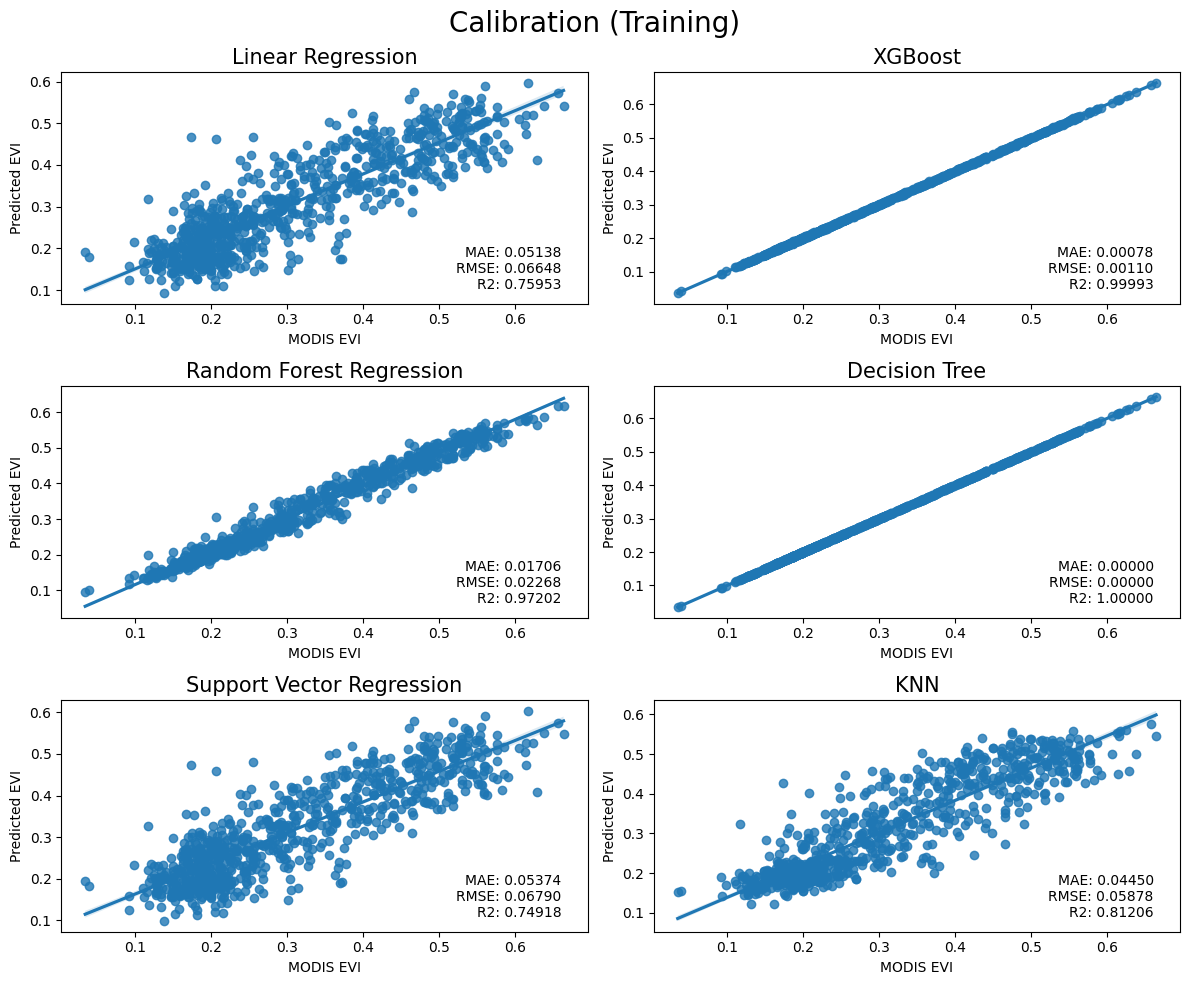

In [ ]:
# Create a figure with 2 subplots arranged in a 1x2 grid
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot the first regression model in the first subplot
sns.regplot(x=y_train, y=lr_train_pred, data=df, ax=axs[0,0])
axs[0,0].set_xlabel('MODIS EVI')
axs[0,0].set_ylabel('Predicted EVI')
axs[0,0].set_title('Linear Regression')
axs[0,0].title.set_size(15)

metrics_text_lr = f'MAE: {mae_lr_train:.5f}\nRMSE: {rmse_lr_train:.5f}\nR2: {r2_lr_train:.5f}'
axs[0, 0].text(0.95, 0.05, metrics_text_lr, transform=axs[0, 0].transAxes, ha='right', va='bottom', fontsize=10)

# Plot the first regression model in the first subplot
sns.regplot(x=y_train, y=xgb_train_pred, data=df, ax=axs[0,1])
axs[0,1].set_xlabel('MODIS EVI')
axs[0,1].set_ylabel('Predicted EVI')
axs[0,1].set_title('XGBoost')
axs[0,1].title.set_size(15)

metrics_text_x = f'MAE: {mae_x_train:.5f}\nRMSE: {rmse_x_train:.5f}\nR2: {r2_x_train:.5f}'
axs[0, 1].text(0.95, 0.05, metrics_text_x, transform=axs[0, 1].transAxes, ha='right', va='bottom', fontsize=10)

# Plot the second regression model in the second subplot
sns.regplot(x=y_train, y=rf_train_pred, data=df, ax=axs[1,0])
axs[1,0].set_xlabel('MODIS EVI')
axs[1,0].set_ylabel('Predicted EVI')
axs[1,0].set_title('Random Forest Regression')
axs[1,0].title.set_size(15)

metrics_text_rf = f'MAE: {mae_rf_train:.5f}\nRMSE: {rmse_rf_train:.5f}\nR2: {r2_rf_train:.5f}'
axs[1, 0].text(0.95, 0.05, metrics_text_rf, transform=axs[1, 0].transAxes, ha='right', va='bottom', fontsize=10)

sns.regplot(x=y_train, y=dt_train_pred, data=df, ax=axs[1,1])
axs[1,1].set_xlabel('MODIS EVI')
axs[1,1].set_ylabel('Predicted EVI')
axs[1,1].set_title('Decision Tree')
axs[1,1].title.set_size(15)

metrics_text_dt = f'MAE: {mae_dt_train:.5f}\nRMSE: {rmse_dt_train:.5f}\nR2: {r2_dt_train:.5f}'
axs[1, 1].text(0.95, 0.05, metrics_text_dt, transform=axs[1, 1].transAxes, ha='right', va='bottom', fontsize=10)

sns.regplot(x=y_train, y=svr_train_pred, data=df, ax=axs[2,0])
axs[2,0].set_xlabel('MODIS EVI')
axs[2,0].set_ylabel('Predicted EVI')
axs[2,0].set_title('Support Vector Regression')
axs[2,0].title.set_size(15)

metrics_text_svr = f'MAE: {mae_svr_train:.5f}\nRMSE: {rmse_svr_train:.5f}\nR2: {r2_svr_train:.5f}'
axs[2, 0].text(0.95, 0.05, metrics_text_svr, transform=axs[2, 0].transAxes, ha='right', va='bottom', fontsize=10)

sns.regplot(x=y_train, y=knn_train_pred, data=df, ax=axs[2,1])
axs[2,1].set_xlabel('MODIS EVI')
axs[2,1].set_ylabel('Predicted EVI')
axs[2,1].set_title('KNN')
axs[2,1].title.set_size(15)

metrics_text_knn = f'MAE: {mae_knn_train:.5f}\nRMSE: {rmse_knn_train:.5f}\nR2: {r2_knn_train:.5f}'
axs[2, 1].text(0.95, 0.05, metrics_text_knn, transform=axs[2, 1].transAxes, ha='right', va='bottom', fontsize=10)

plt.suptitle('Calibration (Training)', fontsize=20)

plt.tight_layout()
# Add a title for the whole figure
#fig.subplots_adjust(hspace=0.5)

#fig.delaxes(axs[2,1])
# Show the plot
plt.show()

### Testing

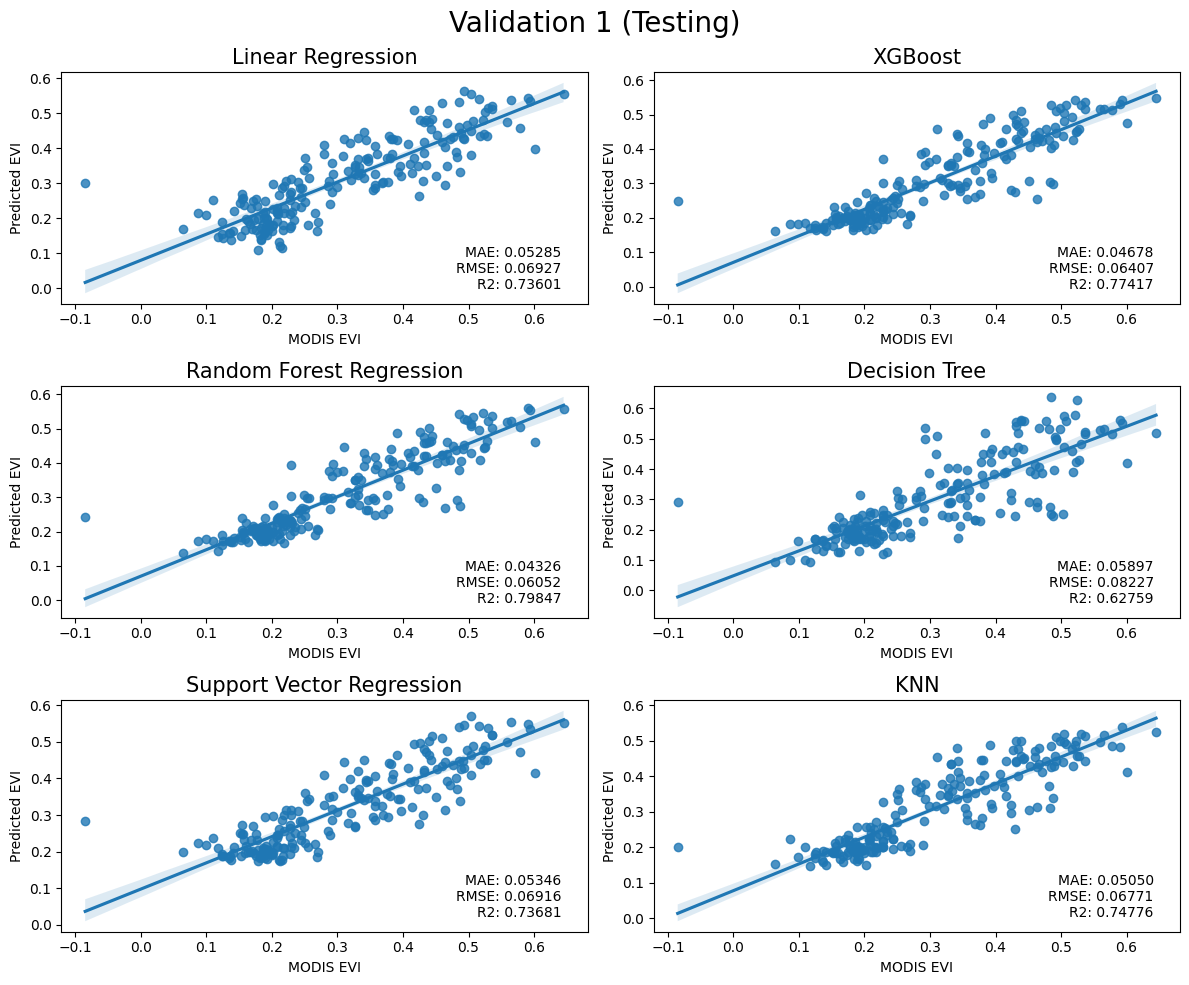

In [ ]:
# Create a figure with 2 subplots arranged in a 1x2 grid
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot the first regression model in the first subplot
sns.regplot(x=y_test, y=y_pred_l, data=df, ax=axs[0,0])
axs[0,0].set_xlabel('MODIS EVI')
axs[0,0].set_ylabel('Predicted EVI')
axs[0,0].set_title('Linear Regression')
axs[0,0].title.set_size(15)

metrics_text_lr = f'MAE: {mae_lr_test:.5f}\nRMSE: {rmse_lr_test:.5f}\nR2: {r2_lr_test:.5f}'
axs[0, 0].text(0.95, 0.05, metrics_text_lr, transform=axs[0, 0].transAxes, ha='right', va='bottom', fontsize=10)

# Plot the first regression model in the first subplot
sns.regplot(x=y_test, y=y_pred_x, data=df, ax=axs[0,1])
axs[0,1].set_xlabel('MODIS EVI')
axs[0,1].set_ylabel('Predicted EVI')
axs[0,1].set_title('XGBoost')
axs[0,1].title.set_size(15)

metrics_text_x = f'MAE: {mae_x_test:.5f}\nRMSE: {rmse_x_test:.5f}\nR2: {r2_x_test:.5f}'
axs[0, 1].text(0.95, 0.05, metrics_text_x, transform=axs[0, 1].transAxes, ha='right', va='bottom', fontsize=10)

# Plot the second regression model in the second subplot
sns.regplot(x=y_test, y=y_pred_r, data=df, ax=axs[1,0])
axs[1,0].set_xlabel('MODIS EVI')
axs[1,0].set_ylabel('Predicted EVI')
axs[1,0].set_title('Random Forest Regression')
axs[1,0].title.set_size(15)

metrics_text_rf = f'MAE: {mae_rf_test:.5f}\nRMSE: {rmse_rf_test:.5f}\nR2: {r2_rf_test:.5f}'
axs[1, 0].text(0.95, 0.05, metrics_text_rf, transform=axs[1, 0].transAxes, ha='right', va='bottom', fontsize=10)

sns.regplot(x=y_test, y=y_pred_d, data=df, ax=axs[1,1])
axs[1,1].set_xlabel('MODIS EVI')
axs[1,1].set_ylabel('Predicted EVI')
axs[1,1].set_title('Decision Tree')
axs[1,1].title.set_size(15)

metrics_text_dt = f'MAE: {mae_dt_test:.5f}\nRMSE: {rmse_dt_test:.5f}\nR2: {r2_dt_test:.5f}'
axs[1, 1].text(0.95, 0.05, metrics_text_dt, transform=axs[1, 1].transAxes, ha='right', va='bottom', fontsize=10)

sns.regplot(x=y_test, y=y_pred_s, data=df, ax=axs[2,0])
axs[2,0].set_xlabel('MODIS EVI')
axs[2,0].set_ylabel('Predicted EVI')
axs[2,0].set_title('Support Vector Regression')
axs[2,0].title.set_size(15)

metrics_text_svr = f'MAE: {mae_svr_test:.5f}\nRMSE: {rmse_svr_test:.5f}\nR2: {r2_svr_test:.5f}'
axs[2, 0].text(0.95, 0.05, metrics_text_svr, transform=axs[2, 0].transAxes, ha='right', va='bottom', fontsize=10)

sns.regplot(x=y_test, y=y_pred_k, data=df, ax=axs[2,1])
axs[2,1].set_xlabel('MODIS EVI')
axs[2,1].set_ylabel('Predicted EVI')
axs[2,1].set_title('KNN')
axs[2,1].title.set_size(15)

metrics_text_knn = f'MAE: {mae_knn_test:.5f}\nRMSE: {rmse_knn_test:.5f}\nR2: {r2_knn_test:.5f}'
axs[2, 1].text(0.95, 0.05, metrics_text_knn, transform=axs[2, 1].transAxes, ha='right', va='bottom', fontsize=10)

plt.suptitle('Validation 1 (Testing)', fontsize=20)

plt.tight_layout()
# Add a title for the whole figure
#fig.subplots_adjust(hspace=0.5)

#fig.delaxes(axs[2,1])
# Show the plot
plt.show()

## Saving Models

In [ ]:
# Save models
import pickle

models_base_path = 'Modeling VIs in Tallgrass/models/evi/'

with open(models_base_path + 'linear_regression_evi.pkl', 'wb') as file:
    pickle.dump(simple_lr_model, file)

with open(models_base_path + 'tuned_linear_evi.pkl', 'wb') as file:
    pickle.dump(best_lr_model, file)

with open(models_base_path + 'xgboost_model_evi.pkl', 'wb') as file:
    pickle.dump(simple_xgb_model, file)

with open(models_base_path + 'tuned_xgboost_evi.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)

with open(models_base_path + 'random_forest_evi.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open(models_base_path + 'tuned_rf_evi.pkl', 'wb') as file:
    pickle.dump(rf_grid_search, file)

with open(models_base_path + 'decision_tree_evi.pkl', 'wb') as file:
    pickle.dump(model, file)

with open(models_base_path + 'svr_evi.pkl', 'wb') as file:
    pickle.dump(simple_svr, file)

with open(models_base_path + 'tuned_svr_evi.pkl', 'wb') as file:
    pickle.dump(best_svr_model, file)

with open(models_base_path + 'knn_evi.pkl', 'wb') as file:
    pickle.dump(simple_knn, file)

with open(models_base_path + 'tuned_knn_evi.pkl', 'wb') as file:
    pickle.dump(best_knn_model, file)

In [ ]:
# End of code 1/29/24
# Edited 9/5/24 due to compatibility issues